In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("gold_monthly_csv.csv")
df.head(10)

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73
5,1950-06,34.73
6,1950-07,34.73
7,1950-08,34.73
8,1950-09,34.73
9,1950-10,34.73


In [3]:
df.shape

(847, 2)

In [6]:
print(f"gold prices are available from {df.loc[:,'Date'][0]} to {df.loc[:,'Date'][len(df)-1]}")

gold prices are available from 1950-01 to 2020-07


In [7]:
date = pd.date_range(start='1/1/1950', end='8/1/2020', freq='M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [8]:
df['month'] = date
df.drop(columns=['Date'], axis=1, inplace=True)
df = df.set_index('month')
df.head(10)

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73
1950-06-30,34.73
1950-07-31,34.73
1950-08-31,34.73
1950-09-30,34.73


In [63]:
from statsmodels.tsa.stattools import adfuller


#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [64]:
adfuller_test(df["Price"])

ADF Test Statistic : 0.8143240077835273
p-value : 0.9918639010465631
#Lags Used : 11
Number of Observations Used : 835
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


Text(0.5, 0, 'months')

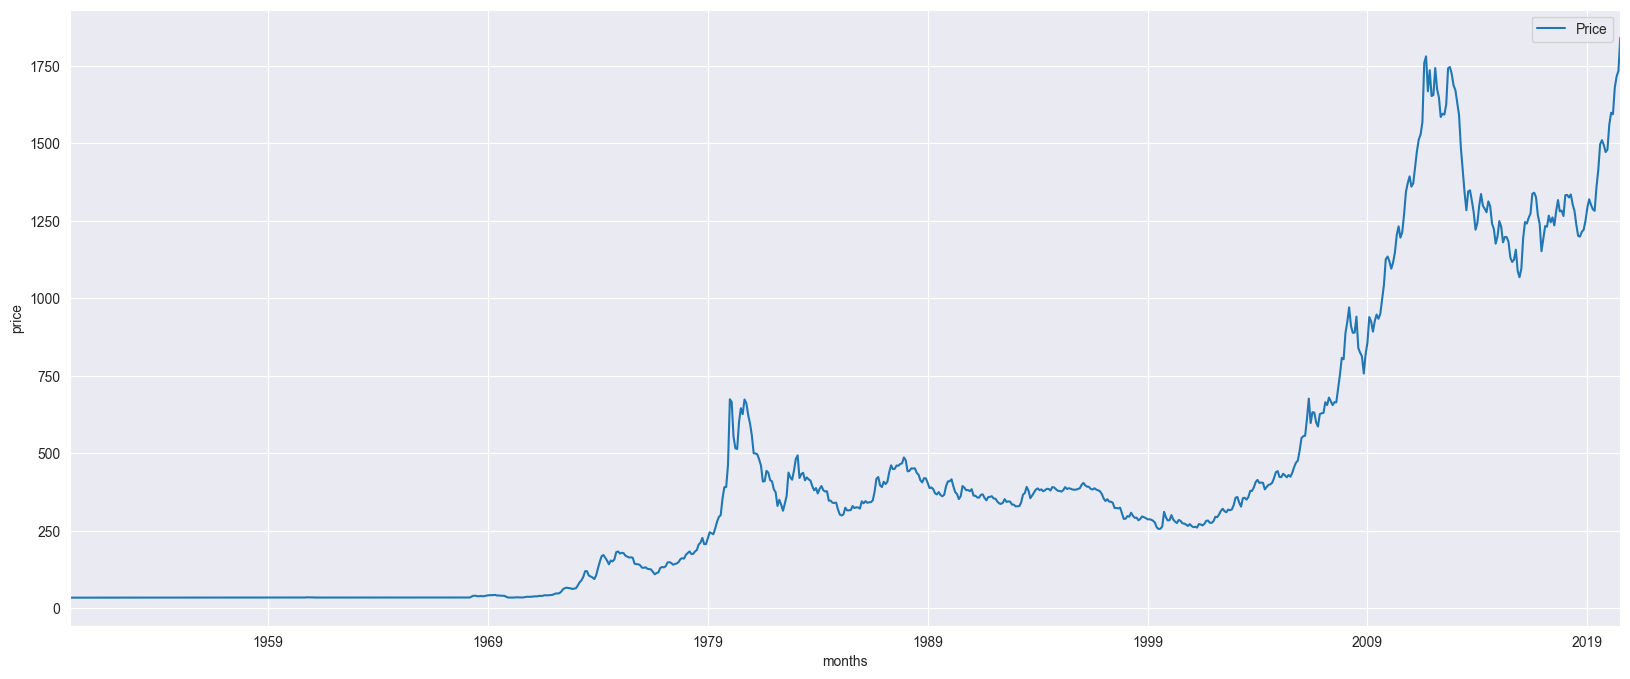

In [10]:
df.plot(figsize=(20,8))
plt.ylabel("price")
plt.xlabel("months")

In [12]:
round(df.describe(),2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


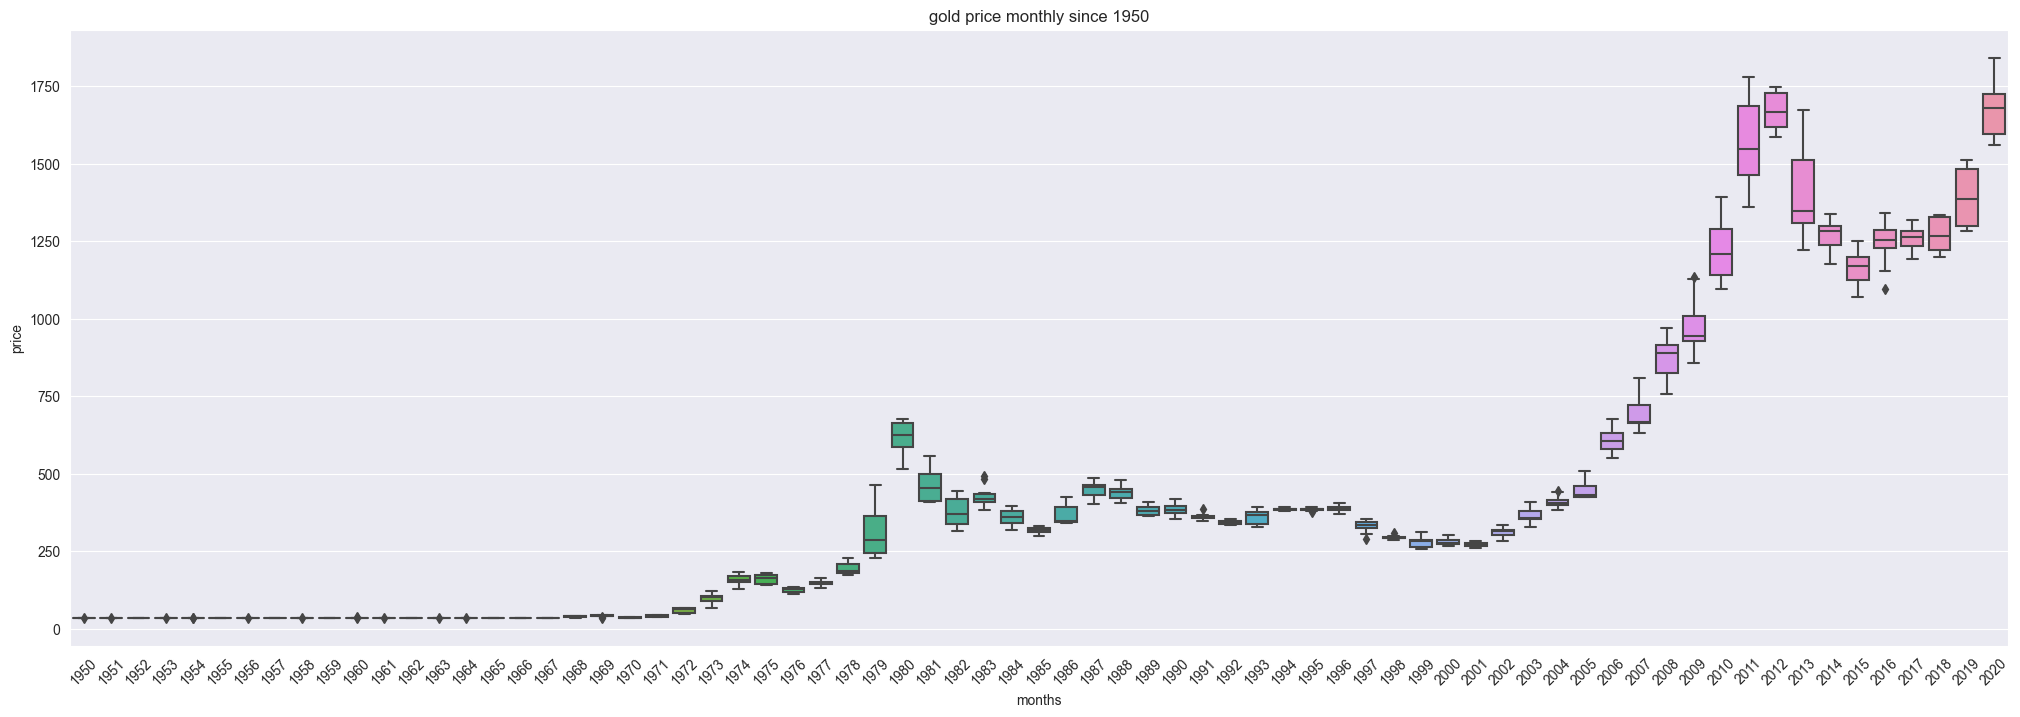

In [14]:
_, ax = plt.subplots(figsize = (25,8))
sns.boxplot(x = df.index.year, y = df.values[:, 0], ax = ax)
plt.title("gold price monthly since 1950")
plt.xlabel("months")
plt.ylabel("price")
plt.xticks(rotation=45)
plt.show()
plt.grid()

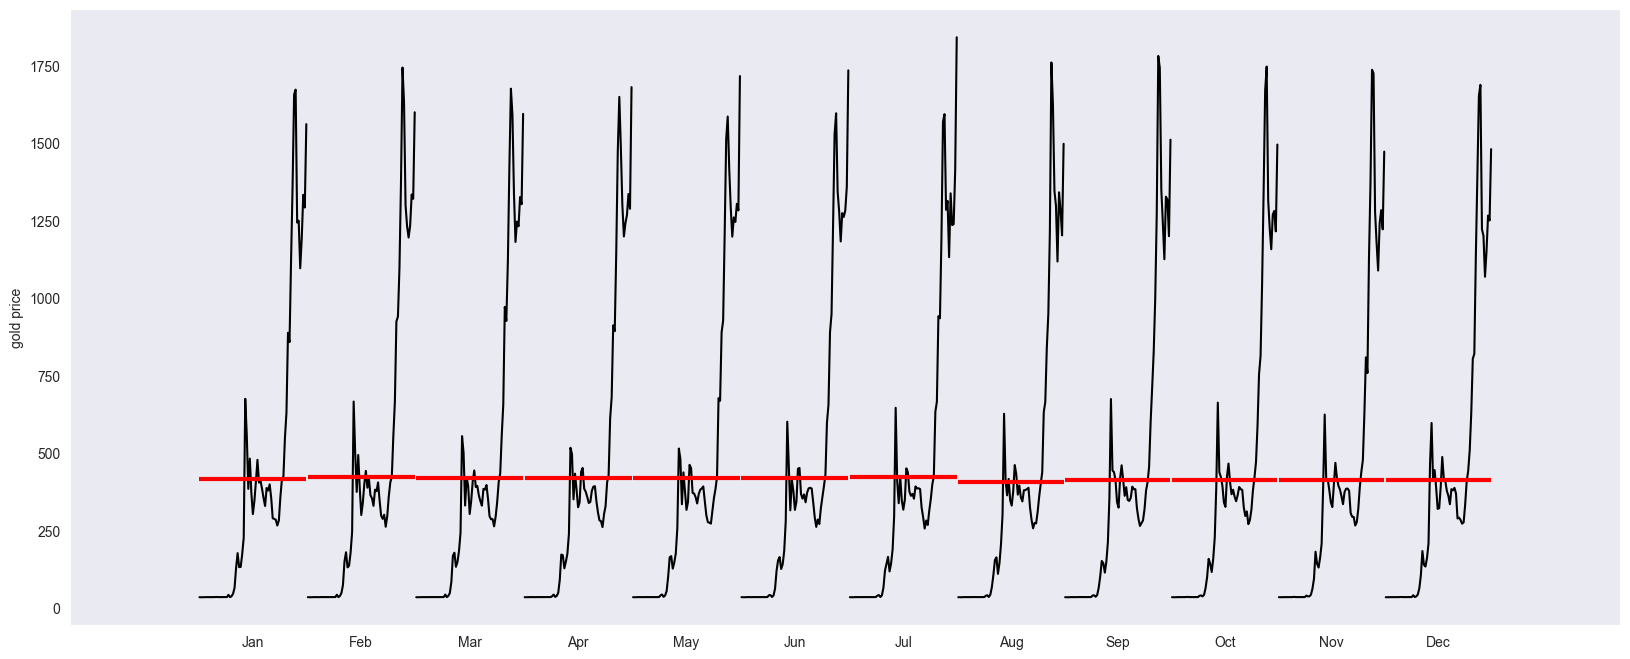

In [15]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize = (20,8))
month_plot(df, ylabel="gold price", ax = ax)
plt.grid()

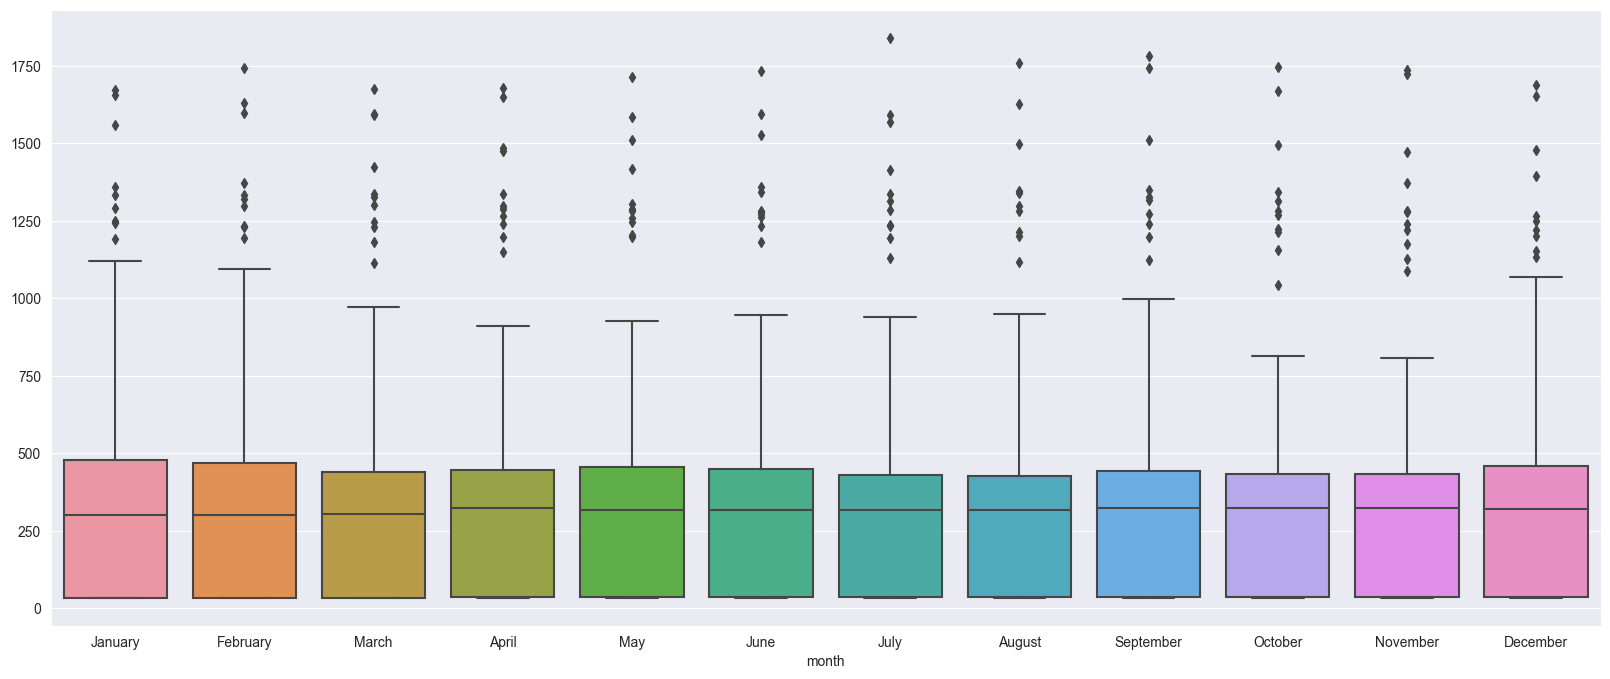

In [16]:
_, ax = plt.subplots(figsize = (20,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:,0], ax=ax)
plt.show()

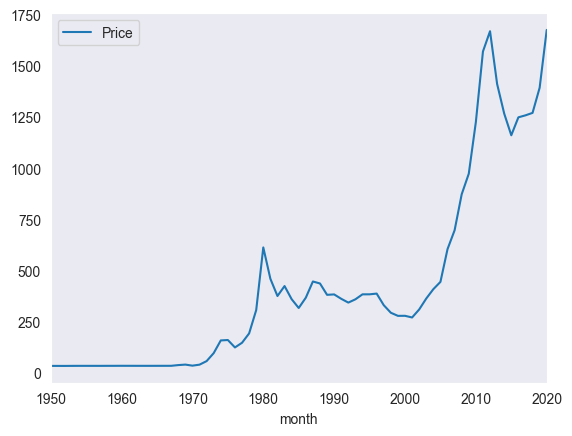

In [19]:
df_yearly_avg = df.resample('A').mean()
df_yearly_avg.plot()
plt.grid()

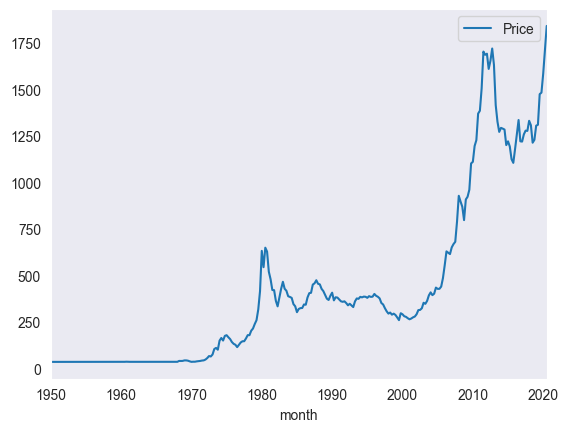

In [20]:
df_quarterly_avg = df.resample('Q').mean()
df_quarterly_avg.plot()
plt.grid()

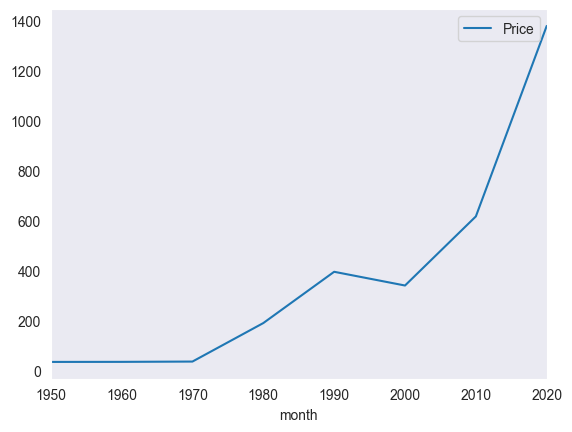

In [21]:
df_decade_avg = df.resample("10Y").mean()
df_decade_avg.plot()
plt.grid()

In [24]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {"Price": "Mean"})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {"Price": "Std"}), left_index=True, right_index=True)
df_1["Cov_pct"] = ((df_1['Std']/df_1["Mean"])*100).round(2)
df_1.head(20)

,Mean,Std,Cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
1955,35.023333,0.034728,0.10
1956,34.987500,0.031079,0.09
1957,34.947500,0.039801,0.11
1958,35.091667,0.027247,0.08


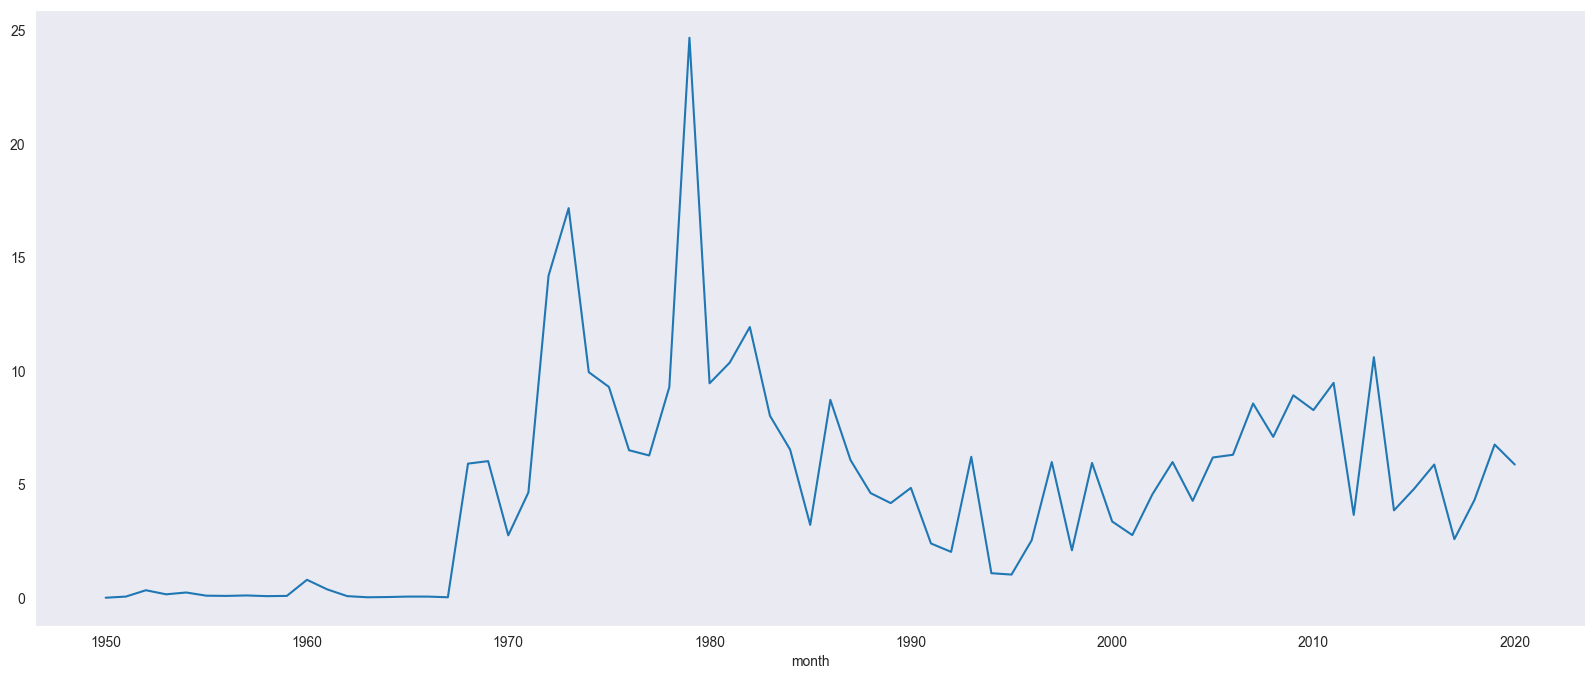

In [25]:
fig, ax = plt.subplots(figsize=(20,8))
df_1['Cov_pct'].plot()
plt.grid()

In [26]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

print(train.size)
print(test.size)

792
55


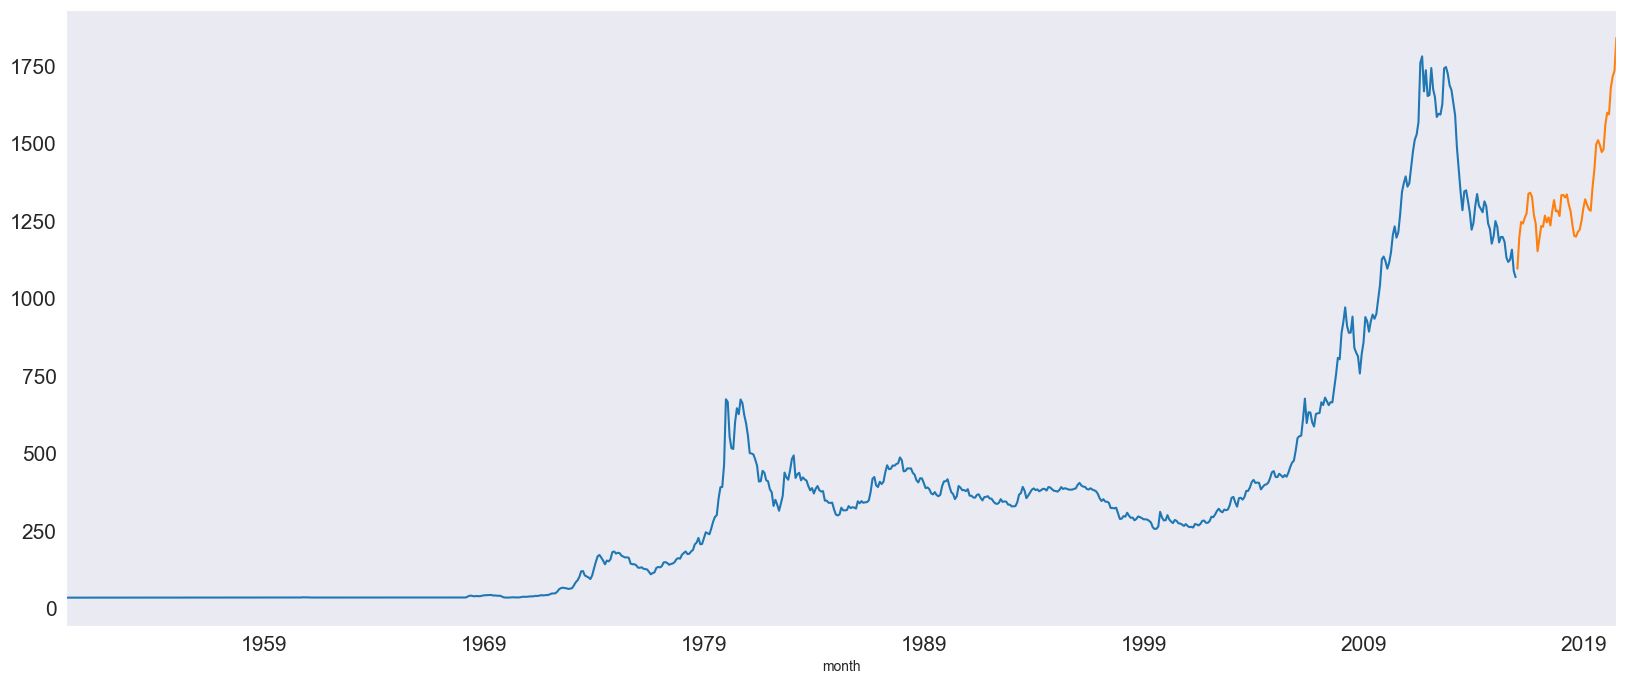

In [27]:
train["Price"].plot(figsize = (20,8), fontsize=15)
test["Price"].plot(figsize = (20,8), fontsize=15)
plt.grid()

In [28]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+1 for i in range(len(test))]

In [29]:
LR_train=train.copy()
LR_test=test.copy()

In [30]:
LR_train["time"] = train_time
LR_test["time"] = test_time

In [46]:
lr = KNeighborsRegressor()
lr.fit(LR_train[["time"]], LR_train["Price"].values)

KNeighborsRegressor()

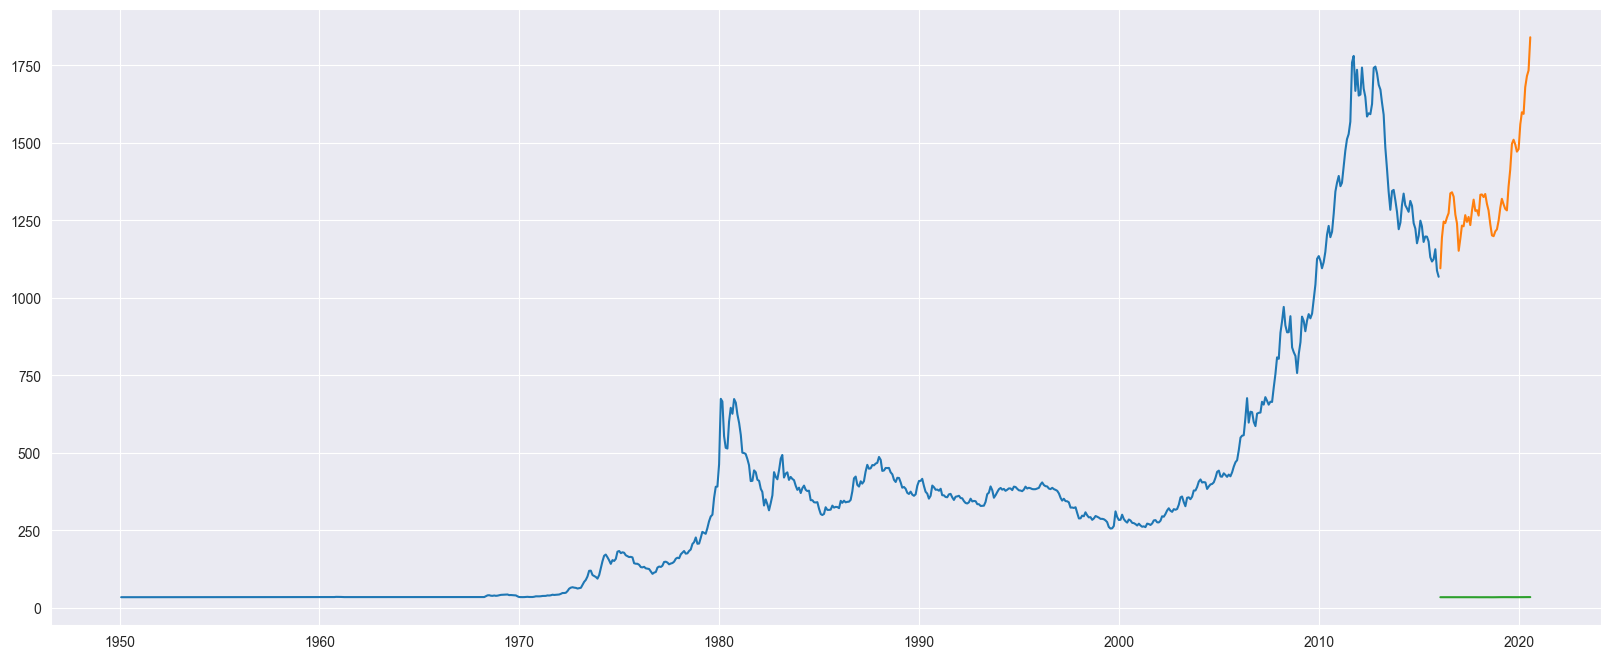

In [47]:
test_predictions = lr.predict(LR_test[["time"]])
LR_test["forecast"] = test_predictions
plt.figure(figsize=(20,8))
plt.plot(train["Price"], label="train")
plt.plot(test["Price"], label="test")
plt.plot(LR_test["forecast"], label="reg on time")

In [48]:
def compute_MAPE(actual, predicted):
    return round((np.mean(abs(actual-predicted)/actual))*100,2)

In [49]:
mape = compute_MAPE(test["Price"].values, test_predictions)
print(mape)

97.38


In [50]:
results = pd.DataFrame({"Test Mape": [mape]}, index=["RegressionOnTime"])
results

,Test Mape
RegressionOnTime,97.38


In [51]:
Naive_train = train.copy()
Naive_test = test.copy()

In [53]:
Naive_test['naive'] = np.asanyarray(train["Price"])[len(np.asanyarray(train["Price"]))-1]
Naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

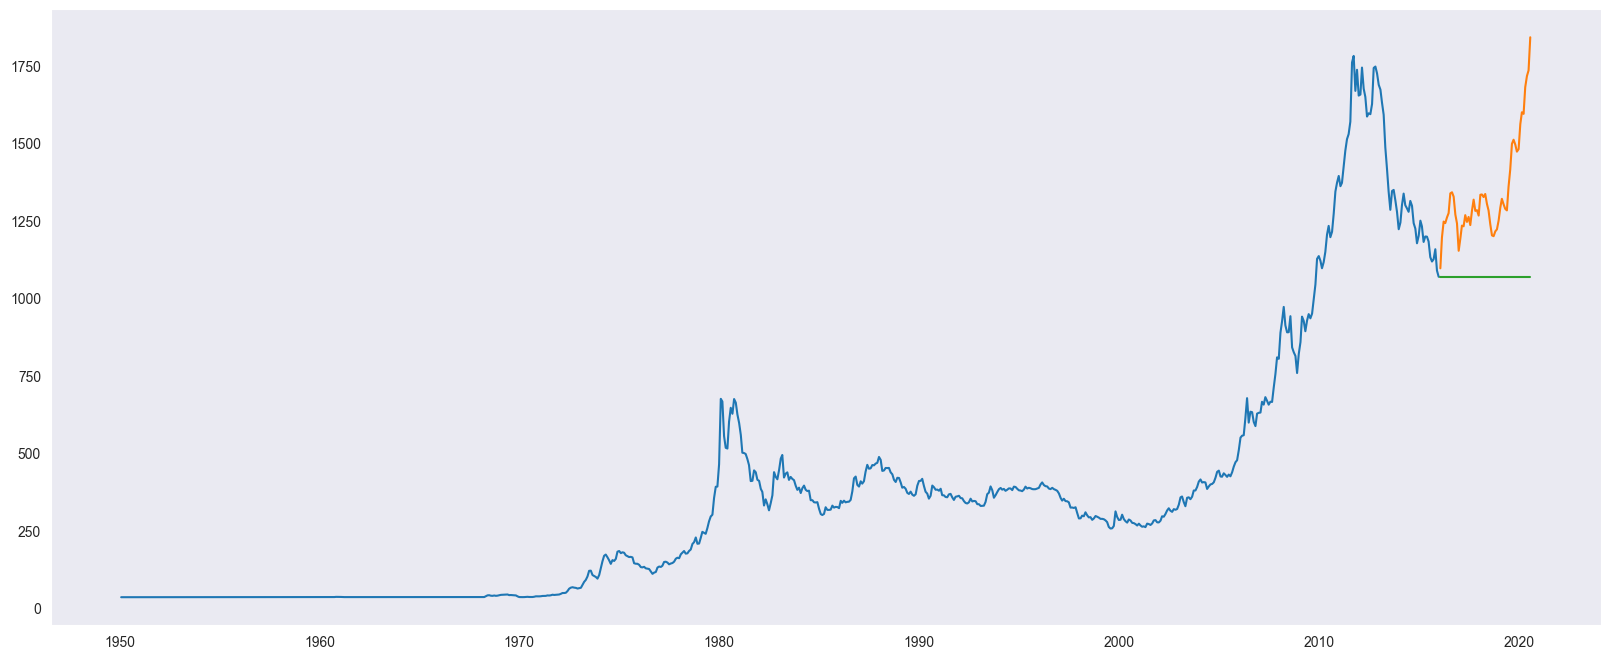

In [54]:
plt.figure(figsize=(20,8))
plt.plot(Naive_train["Price"], label="Train")
plt.plot(test["Price"], label="Test")
plt.plot(Naive_test["naive"], label="Naive Forecast on test data")
plt.grid()

In [56]:
test_mape = compute_MAPE(test["Price"].values, Naive_test["naive"].values)
print("naive forcast on test data is %3.3f" %(test_mape), "%")

naive forcast on test data is 19.380 %


In [57]:
result_2 = pd.DataFrame({"Test MAPE (%)": [test_mape]}, index=["NaiveModel"])
results = pd.concat([results, result_2])
results

,Test Mape,Test MAPE (%)
RegressionOnTime,97.38,NaN
NaiveModel,NaN,19.38


In [58]:
final_model = ExponentialSmoothing(df, trend='additive', seasonal='additive').fit(smoothing_level=0.4, smoothing_trend=0.3,smoothing_seasonal=0.6)

In [59]:
final_model_mape = compute_MAPE(df["Price"].values, final_model.fittedvalues)
print("MAPE: ", final_model_mape)

MAPE:  17.24


In [60]:
predictions = final_model.forecast(steps=len(test))

In [61]:
predicted_df = pd.DataFrame({"lower_CI": predictions - 1.96*np.std(final_model.resid, ddof=1), "prediction": predictions, "upper_CI": predictions+1.96*np.std(final_model.resid, ddof=1)})

predicted_df.head()

,lower_CI,prediction,upper_CI
2020-08-31,1684.717694,1792.868667,1901.019639
2020-09-30,1615.300396,1723.451368,1831.602341
2020-10-31,1538.558507,1646.709480,1754.860453
2020-11-30,1476.745521,1584.896493,1693.047466
2020-12-31,1459.311094,1567.462067,1675.613039


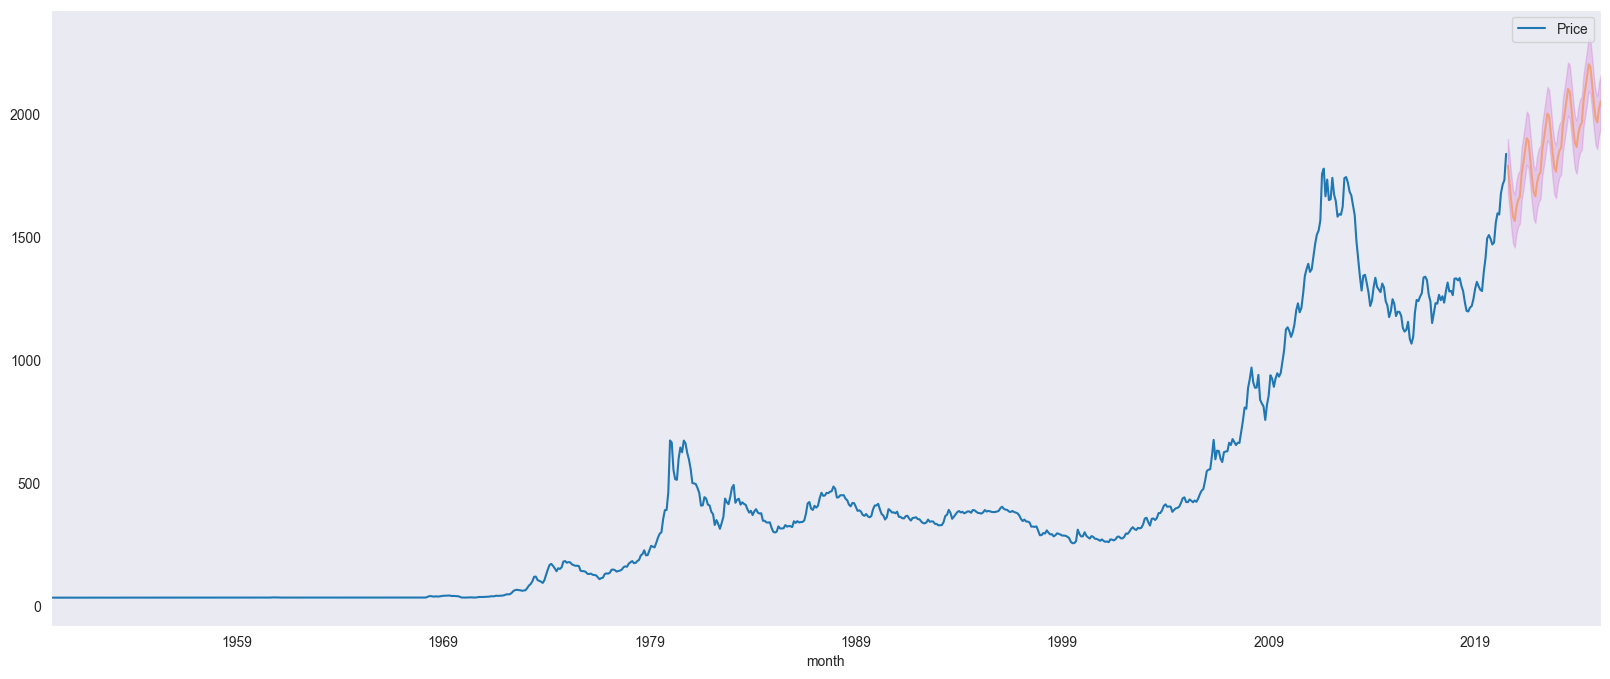

In [62]:
axis = df.plot(label="Actual", figsize=(20,8))
predicted_df["prediction"].plot(ax=axis, label="Forecast", alpha=0.5)
axis.fill_between(predicted_df.index,predicted_df["lower_CI"],predicted_df["upper_CI"], color="m", alpha=0.15)
plt.grid()